# VAD Evaluations

This notebook evaulates three different Voice Activity Detectors on SuperVAD#1 dataset

In [1]:
import os
import torch
import torchaudio
from evaluation import silero_vad, webrtc_vad, super_vad, super_vad_torch
from utils import plot_waveform, plot_specgram, plot_labels, play_audio, naive_normalize_spectogram
from datasets import SAMPLE_RATE, DATASET_SAMPLE_LENGTH, TOKENS_PER_SECOND, preprocessed_audio_dataset, sample_dataset

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /home/steve/.cache/torch/hub/master.zip


## Dataset
Loading dataset and visualizing random sample from it.

Do not forget to execute `./download.sh` before launching this notebook

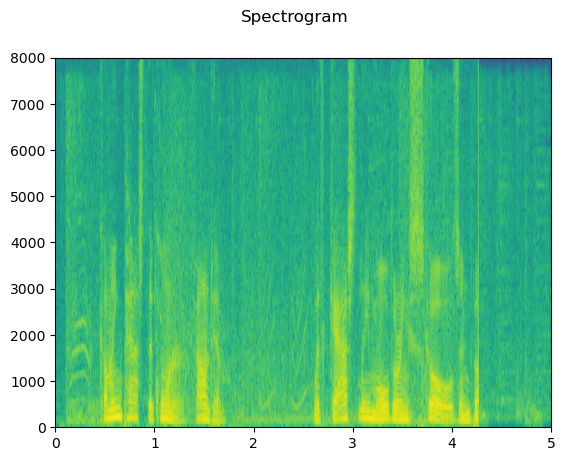

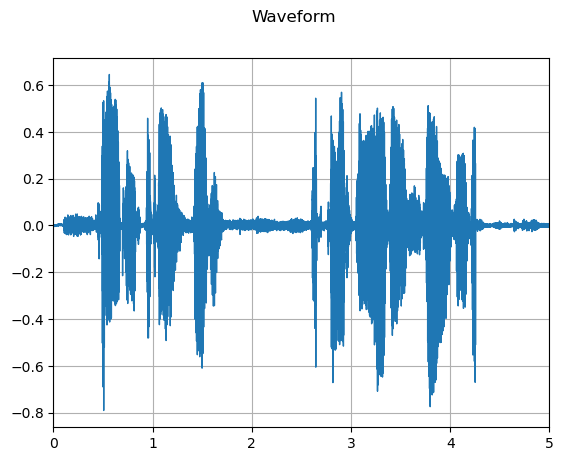

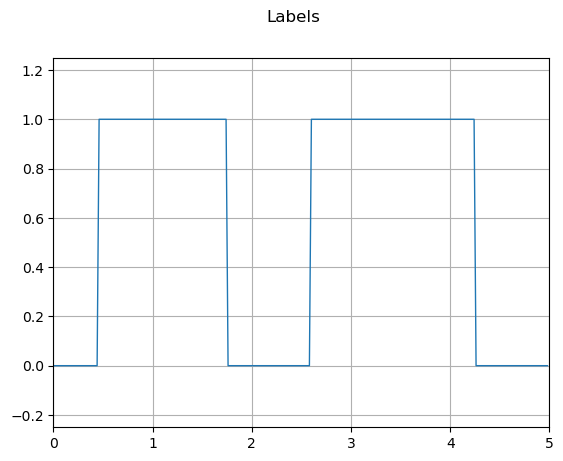

In [2]:
dataset = preprocessed_audio_dataset("./datasets/supervad-1/vad_test/")
# sample, labels = dataset[22]
sample, labels = sample_dataset(dataset)

plot_specgram(sample.unsqueeze(0))
plot_waveform(sample.unsqueeze(0))
plot_labels(labels)
play_audio(sample)

/home/steve/miniconda3/envs/jupyter/lib/python3.11/site-packages/torch/functional.py:660: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at /opt/conda/conda-bld/pytorch_1704008515581/work/aten/src/ATen/native/SpectralOps.cpp:874.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]


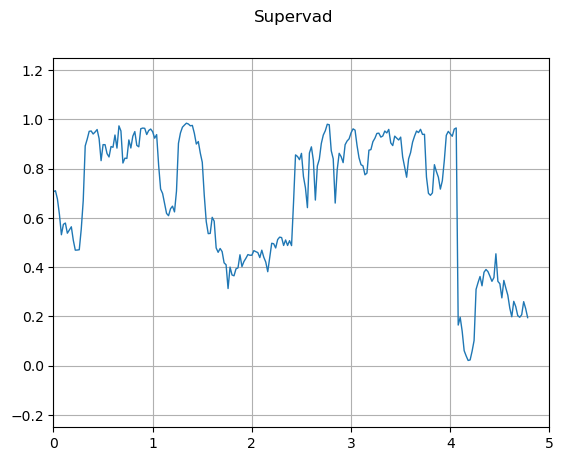

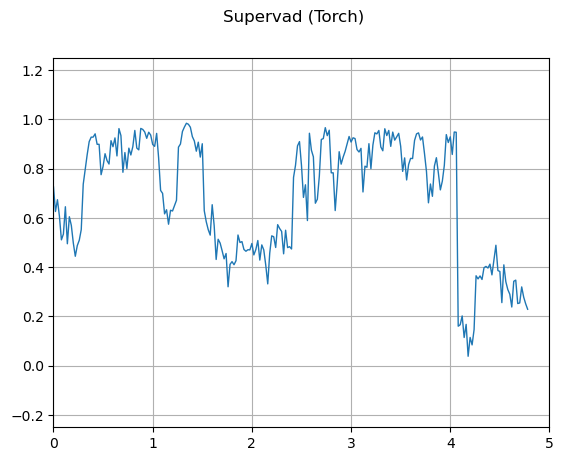

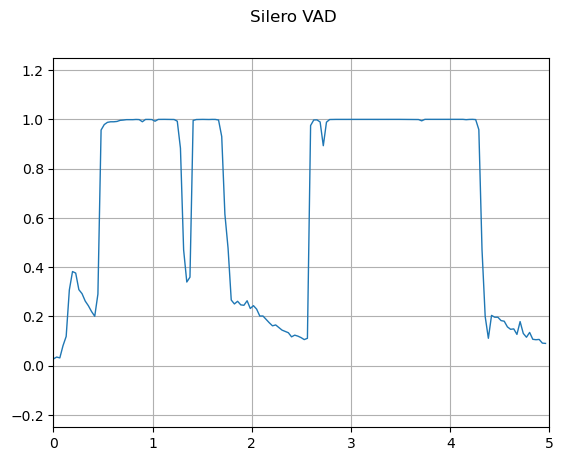

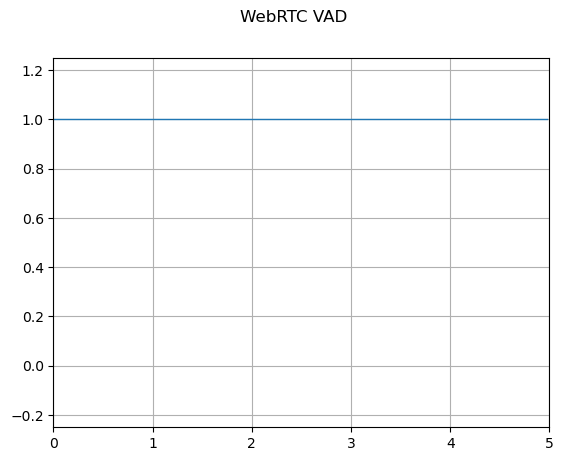

In [3]:
# Evaluations
plot_labels(super_vad(sample), title="Supervad")
plot_labels(super_vad_torch(sample), title="Supervad (Torch)")
plot_labels(silero_vad(sample), sample_rate=31.25, title="Silero VAD")
plot_labels(webrtc_vad(sample), title="WebRTC VAD")

### File for evaluation

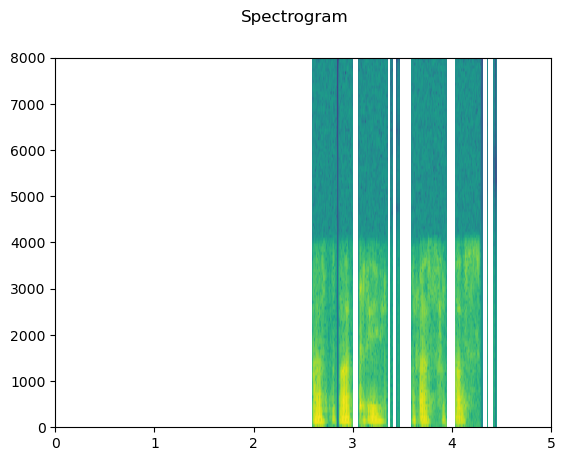

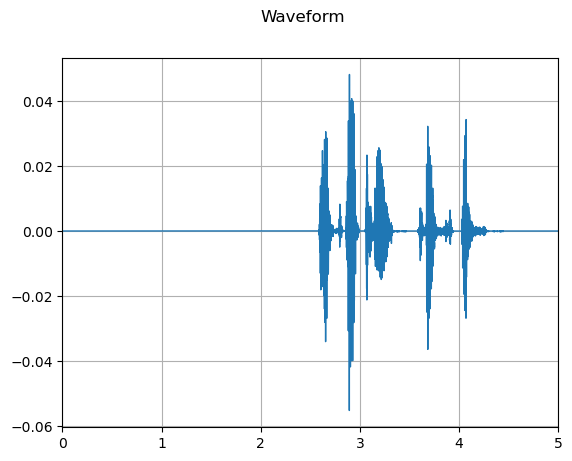

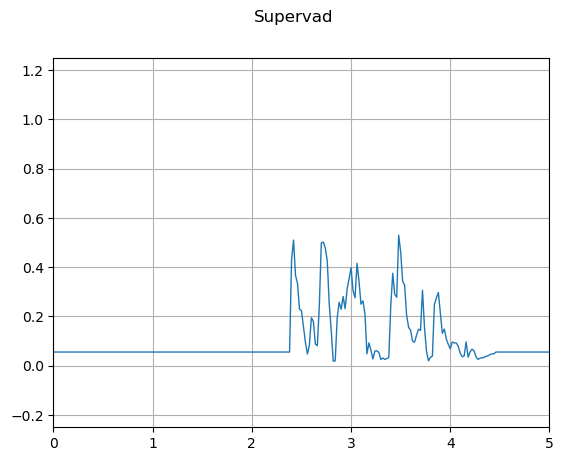

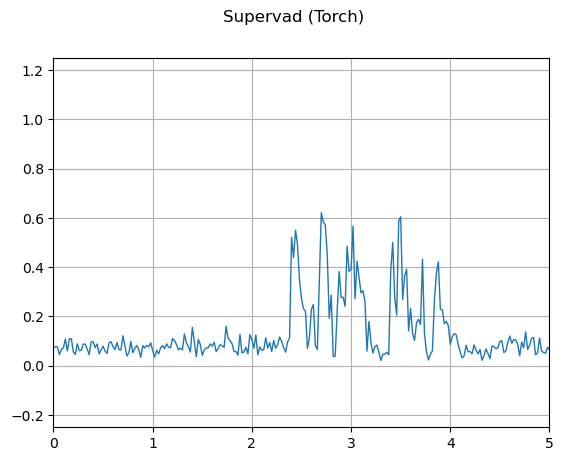

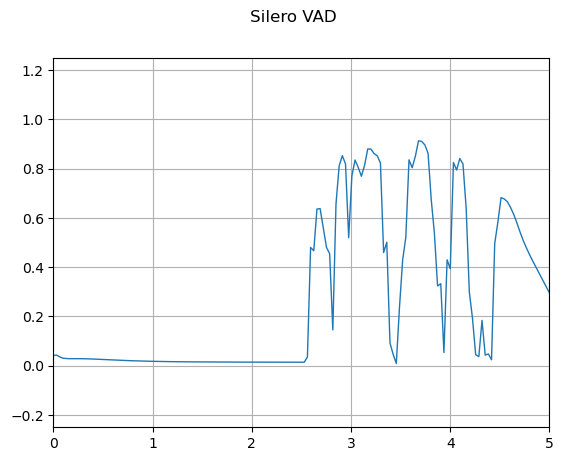

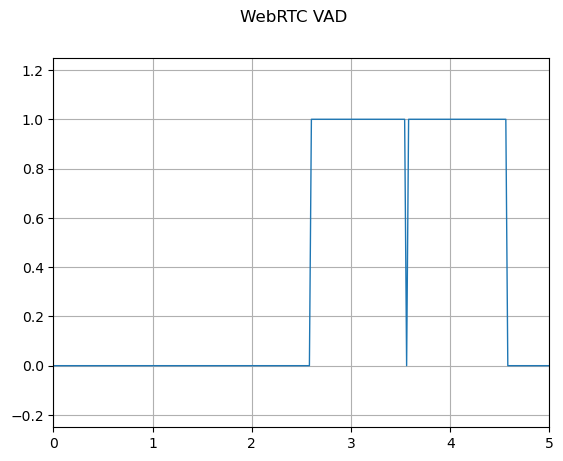

In [5]:
sample = torchaudio.load("./call.wav")[0][0]
plot_specgram(sample.unsqueeze(0))
plot_waveform(sample.unsqueeze(0))
play_audio(sample)
plot_labels(super_vad(sample), title="Supervad")
plot_labels(super_vad_torch(sample), title="Supervad (Torch)")
plot_labels(silero_vad(sample), sample_rate=31.25, title="Silero VAD")
plot_labels(webrtc_vad(sample), title="WebRTC VAD")